!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm

import binascii
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 200

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
world_size = 20
world_size_x = world_size
world_size_y = world_size

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## add genome

for indiv in result:
    result[indiv]['genome'] = [i.hex_id for i in individuals[indiv]]
    
## assign position remove brains without output

pos = generate_random_coords(world_size, nr_individuals)
assign_position_and_remove_outputless_brains(result, pos)


In [4]:
k = world_size
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pos_list = [tuple(result[obj]['position'][-1]) for obj in result]
    res = list(set([ele for ele in pos_list if pos_list.count(ele) > 1]))
    pbar.update(1)
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)    
        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
    prevent_overlap_movement(last_pos_list, result)
    n += 1
pbar.close()


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.01it/s]


<IPython.core.display.Javascript object>


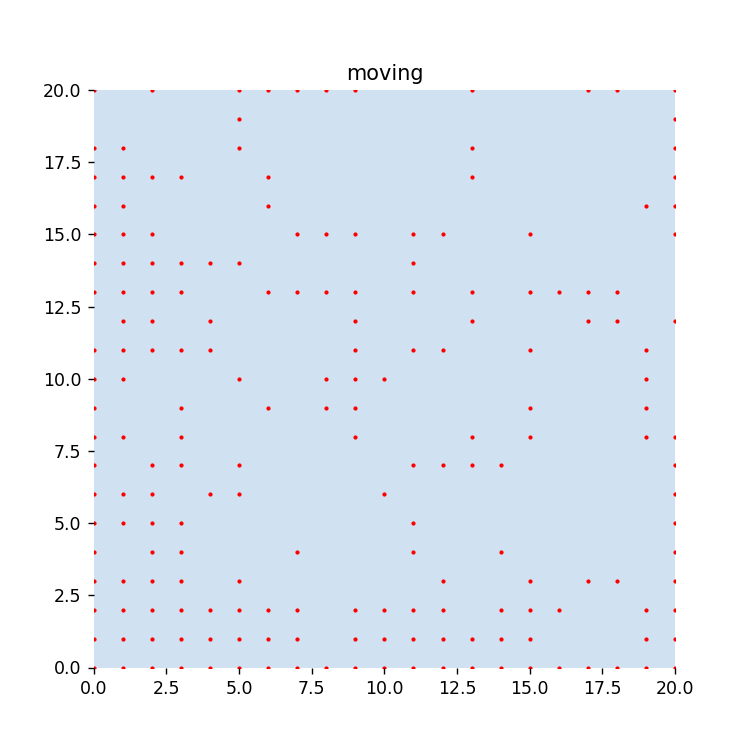

MovieWriter imagemagick unavailable; using Pillow instead.


In [6]:
gen_nr = 1
coords = generate_dictionary_of_coords(result, world_size+1)

def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()]
    
 
fig, ax = plt.subplots(figsize=(6,6))
myAnimation = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)
myAnimation.save(f'generation-{gen_nr}.gif', writer='imagemagick' , fps=10)

### mutation

In [7]:
## select individuals from safe zone
safe_zone = int(world_size * 0.75)
n=0
survivors = {}
for key in result:
    x = result[key]['position'][-1][0]
    if x > safe_zone:
        survivors[n] = {'genome':[]}
        survivors[n]['genome'] = result[key]['genome']
        n+=1

## reproduct survivors        
new_indiv_len = nr_individuals - list(survivors.keys())[-1]
new_indiv_nr = np.random.choice(list(survivors.keys()), new_indiv_len-1)

## mutate population
for key in new_indiv_nr:
    survivors[n] = {'genome':[]}
    survivors[n]['genome'] = survivors[key]['genome'] 
    n+=1
    
for key in survivors:
    genome_mutation(survivors[key]['genome'])

In [8]:


dic = {}
for nr_idividual in survivors:
    dic[nr_idividual] = gene_to_neuron(survivors[nr_idividual]['genome'], nr_of_input, nr_of_actions, nr_of_inner)
    
result = calculate_individual_output_weights(dic)    
